<div><font face="Times New Roman" size=7><br><br>
<center>
Linear Regression and Regularization
<center><br></div>
 

### Machine Learning for Bioinformatics: Homework 1 (Practical)
*Refer to (preferably)Quera or Amir Soleimanifar for any questions you have or other inconveniences*  
*Telegram ID: @amirsoleix*  
*Email: asoleix@gmail.com*

## Overview
<font face="Arial" size=4><br>
We want to train a model which estimates obesity levels based on eating habits and physical conditions of an individual. For our purpose, we will use a dataset of individuals from the countries of Mexico, Peru and Columbia.  
The dataset was collected by Fabio Mendoza Palechor and ALexis de la Hoz Manotas.

## Description 
<font face="Arial" size=4><br>
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

## Practical Phase 
<font face="Arial" size=4><br>
You need to complete each section by writing the relevant code, running and assessing the results. Feel free to add new code or markdown cells. After all snippets have been completed, save the results and upload the Jupyter notebook.

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
data = pd.read_csv('./dataset_bmi.csv')
print(data.shape)
data.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,18.9
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,22.7
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,21.6
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,28.0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,26.6


## Split the Data  
<font face="Arial" size=4><br>
Split the data to training (80 percent) and test (20 percent) sets using Stratified Sampling on `BMI` column.

In [3]:
data['BMI_strata'] = pd.cut(data['BMI'], bins=[0, 18.5, 25, 30, 100])
X = data.drop(columns=['BMI'])
y = data['BMI']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=data['BMI_strata'], random_state=42)

X_train = X_train.drop(['BMI_strata'], axis=1)
X_test = X_test.drop(['BMI_strata'], axis=1)

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Training set: (1688, 16) (1688,)
Test set: (423, 16) (423,)


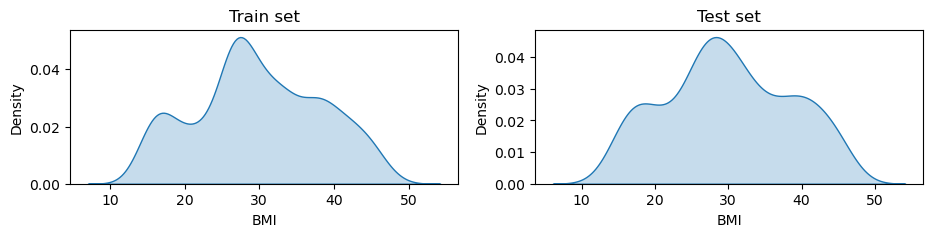

In [4]:
# distribution of train BMI and test BMI
fig = plt.figure(figsize=(11, 2))
ax = fig.add_subplot(1, 2, 1)
sns.kdeplot(y_train,fill=True, ax=ax)
plt.title("Train set")
ax = fig.add_subplot(1, 2, 2)
sns.kdeplot(y_test,fill=True, ax=ax)
plt.title("Test set")
plt.show()

## Exploratory Data Analysis  
<font face="Arial" size=4><br>
Analyze the data and find information about different attributes. Requested items are:
1. Number of categories and distribution of them in either plots or numbers
2. Mean, std, and quartiles of numerical attributes
3. Check for existence of NaN or empty rows  

Visualize the dataset in convenient way and measure the correlation between different columns of the matrix using `corr()` command.

### Number of categories and distribution of them in either plots or numbers

#### Categorical features

In [5]:
cols = X_train.columns
num_cols = X_train._get_numeric_data().columns
num_features = list(num_cols)
cat_features = list(set(cols) - set(num_cols))

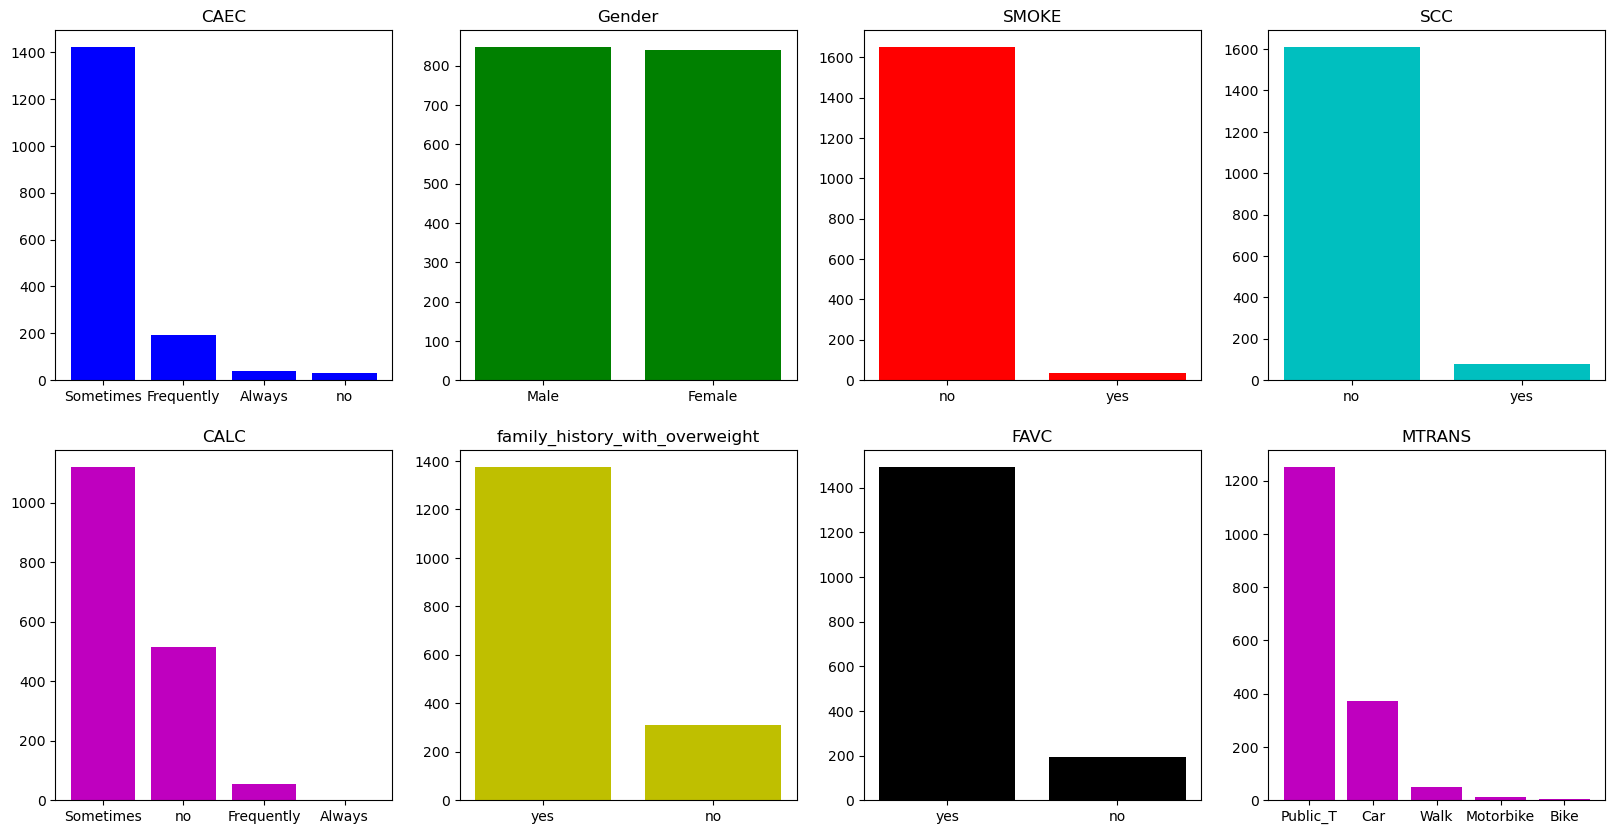

In [6]:
def plot_bar_plot(name):
    name_counts = X_train[name].value_counts()
    return (list(name_counts.index), list(name_counts.values))

fig = plt.figure(figsize=(20, 10))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'm']

trace = 0
for i in range(2):
    for j in range(4):
        ax = fig.add_subplot(2, 4, i*4+j+1)
        if cat_features[trace+j] == 'MTRANS':
            ax.bar(['Public_T', 'Car', 'Walk', 'Motorbike', 'Bike'], list(plot_bar_plot(cat_features[trace+j]))[1], color=colors[i*4+j])
        else: 
            ax.bar(list(plot_bar_plot(cat_features[trace+j]))[0], list(plot_bar_plot(cat_features[trace+j]))[1], color=colors[i*4+j])
        ax.set_title(f"{cat_features[trace+j]}")
    trace = 4
plt.show()

#### Numerical features

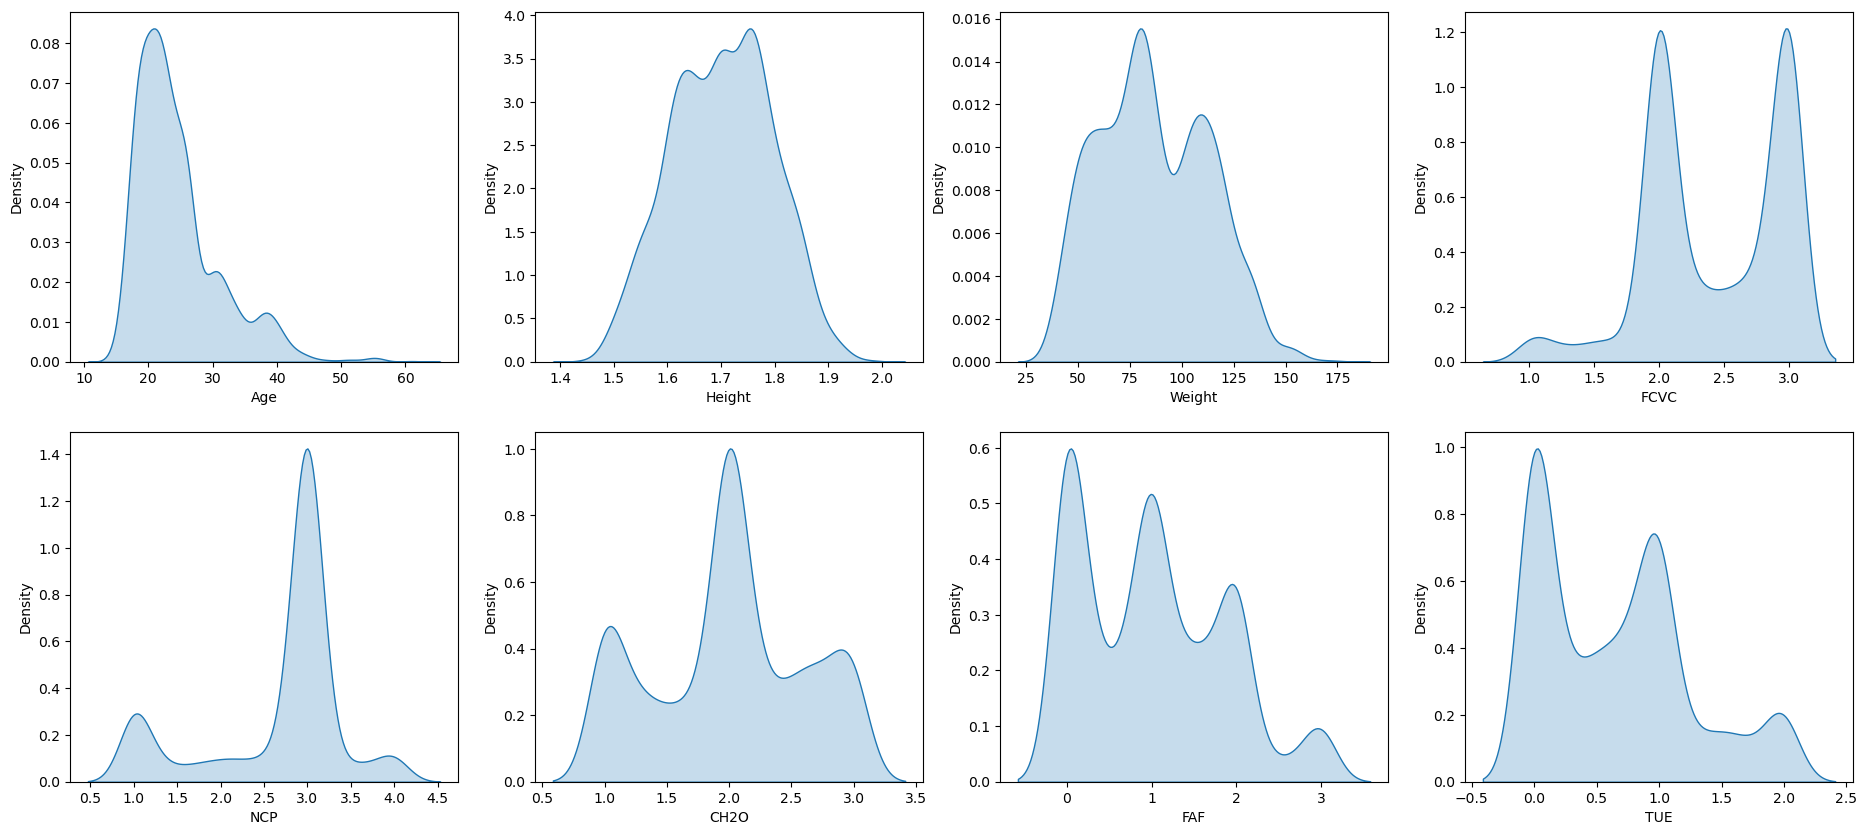

In [7]:
num_dict = pd.DataFrame({num_features[i]:list(X_train[num_features[i]]) for i in range(8)})

fig = plt.figure(figsize=(23, 10))
trace = 0
for i in range(2):
    for j in range(4):
        ax = fig.add_subplot(2, 4, i*4+j+1)
        sns.kdeplot(num_dict[num_features[trace+j]],fill=True, ax=ax)
    trace = 4

plt.show()

In [8]:
def get_stats(myset, index_bool):
    summary_stats = myset.describe()
    mean = summary_stats.loc['mean']
    std = summary_stats.loc['std']
    q1 = summary_stats.loc['25%']
    median = summary_stats.loc['50%']
    q3 = summary_stats.loc['75%']
    
    if index_bool:
        stats_test = pd.DataFrame({
            'Mean': mean,
            'Standard Deviation': std,
            '25th Percentile': q1,
            'Median': median,
            '75th Percentile': q3
        })
    else:
        stats_test = pd.DataFrame({
            'Mean': mean,
            'Standard Deviation': std,
            '25th Percentile': q1,
            'Median': median,
            '75th Percentile': q3
        }, index=[0])

    return stats_test

### Mean, std, and quartiles of numerical attributes

In [9]:
get_stats(X_train, True)

,Mean,Standard Deviation,25th Percentile,Median,75th Percentile
Age,24.461183,6.502643,19.856861,22.886910,26.012808
Height,1.701815,0.093448,1.630000,1.700404,1.769367
Weight,86.602315,26.110138,65.000000,83.000000,108.014255
FCVC,2.415164,0.529634,2.000000,2.373567,3.000000
NCP,2.674377,0.780938,2.607291,3.000000,3.000000
CH2O,1.993846,0.611221,1.542301,2.000000,2.450069
FAF,1.011278,0.846480,0.128113,1.000000,1.662348
TUE,0.651985,0.603656,0.000000,0.621035,1.000000


In [10]:
# BMI train
get_stats(y_train, False)

,Mean,Standard Deviation,25th Percentile,Median,75th Percentile
0,29.89769,8.454453,24.6,29.3,36.6


### Checking for NaN or empty rows in train and test set

In [11]:
print(f'Is there NAN in train set? {X_train.isna().any().any()}')
print(f'Is there empty row in train set? {(X_train.eq("").all(axis=1)).any()}')
print(f'Is there NAN in test set? {X_test.isna().any().any()}')
print(f'Is there empty row in test set? {(X_test.eq("").all(axis=1)).any()}')

Is there NAN in train set? False
Is there empty row in train set? False
Is there NAN in test set? False
Is there empty row in test set? False


### correlation matrix

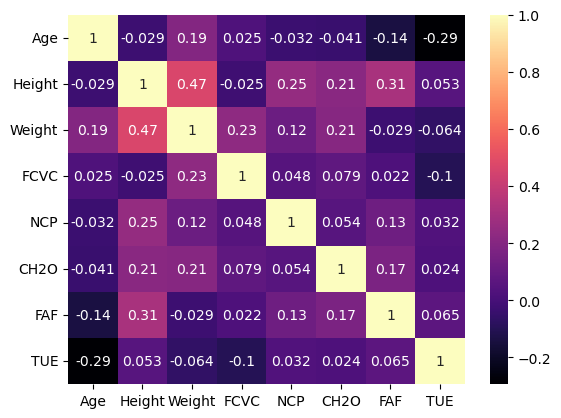

In [12]:
# Without BMI
corr_matrix = X_train.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='magma', annot=True)
plt.show()

##### Here we can see a smooth correlation between height and weight.

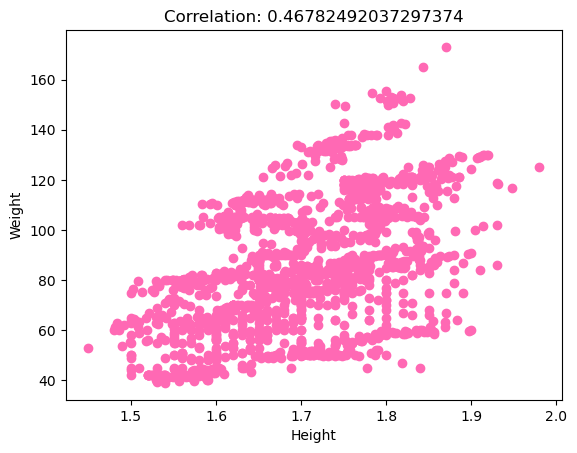

In [13]:
corr = X_train['Height'].corr(X_train['Weight'])
plt.scatter(X_train['Height'], X_train['Weight'], color = 'hotpink')
plt.title('Correlation: ' + str(corr))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

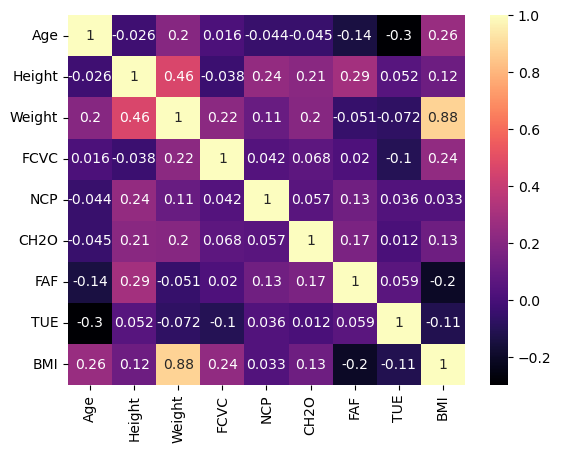

In [14]:
# With BMI
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='magma', annot=True)
plt.show()

#### But when we consider BMI, we can see some attributes are correlated. (for instance BMI and weight are positively correlated)

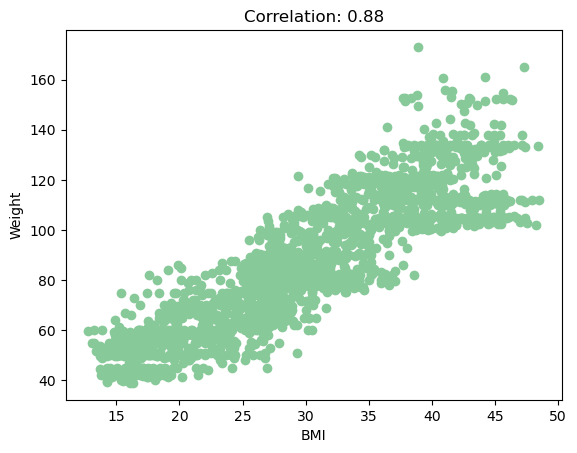

In [15]:
corr = data['BMI'].corr(data['Weight'])
plt.scatter(list(data['BMI']), list(data['Weight']), color = '#88c999')
plt.title('Correlation: ' + f'{corr:.2f}')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.show()


#### We can see how BMI, height, and weight almost form a surface in a 3D space."

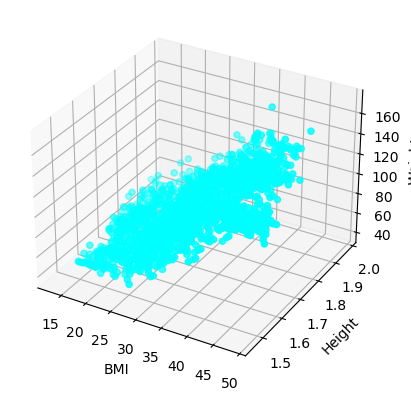

In [16]:
#import ipympl
x = data['BMI']
y = data['Height']
z = data['Weight']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, color='cyan')

ax.set_xlabel('BMI')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
plt.show()

<div style="color:green">I conducted tests by removing the height or weight feature due to their strong correlation with BMI, but this did not result in a significant improvement to my model. Therefore, I decided to revert the changes and keep them.</div>


## Data Cleaning and Manipulation  
<font face="Arial" size=4><br>
Transform all categorical attributes to numerical attributes using ordinal encoders if the attribute is ordinal or one-hot encoders if the attribute is nominal.   

In [17]:
# Transform categorical to numerical based on ordinal or numinal
cat_dict = pd.DataFrame({cat_features[i]:list(X_train[cat_features[i]]) for i in range(8)})
for col in cat_dict.columns:
    unique_vals = cat_dict[col].unique()
    if len(unique_vals) <= 3:  # Arbitrarily choose 3 as cutoff for nominal vs ordinal
        print(f"{col} is nominal with values {unique_vals}")
    else:
        print(f"{col} is ordinal with values {unique_vals}")


CAEC is ordinal with values ['Sometimes' 'Frequently' 'no' 'Always']
Gender is nominal with values ['Male' 'Female']
SMOKE is nominal with values ['no' 'yes']
SCC is nominal with values ['no' 'yes']
CALC is ordinal with values ['Sometimes' 'no' 'Frequently' 'Always']
family_history_with_overweight is nominal with values ['yes' 'no']
FAVC is nominal with values ['yes' 'no']
MTRANS is ordinal with values ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']


In [18]:
# Ordinal encoding for ordinal attributes
ordinal_encoder = OrdinalEncoder(categories=[['Automobile', 'Motorbike', 'Public_Transportation', 'Bike', 'Walking'],
                                                ['no', 'Sometimes', 'Frequently', 'Always'],
                                                ['no', 'Sometimes', 'Frequently', 'Always']])
# On training set
ord_features = ordinal_encoder.fit_transform(X_train[['MTRANS', 'CAEC', 'CALC']])
X_train['MTRANS'] = ord_features[:,0]
X_train['CAEC'] = ord_features[:,1]
X_train['CALC'] = ord_features[:,2]
# On test set
ord_features = ordinal_encoder.fit_transform(X_test[['MTRANS', 'CAEC', 'CALC']])
X_test['MTRANS'] = ord_features[:,0]
X_test['CAEC'] = ord_features[:,1]
X_test['CALC'] = ord_features[:,2]

In [19]:
# One hot encoding for nominal attributes
dummy_cols = ['FAVC', 'SMOKE', 'family_history_with_overweight', 'SCC', 'Gender']

# On training set
dummy_df = pd.get_dummies(X_train[dummy_cols], prefix=dummy_cols)
X_train = pd.concat([X_train.drop(dummy_cols, axis=1), dummy_df], axis=1)
# On test set
dummy_df = pd.get_dummies(X_test[dummy_cols], prefix=dummy_cols)
X_test = pd.concat([X_test.drop(dummy_cols, axis=1), dummy_df], axis=1)

##### Add at least two attributes to the dataset using information of other columns. Explain the reasons you think the added columns are better indicators of the data.  

In [20]:
# First attribute
X_train['FCVC/NCP'] = X_train['FCVC'] / X_train['NCP']
X_test['FCVC/NCP'] = X_test['FCVC'] / X_test['NCP']

###### Explanation: Eating more vegetables and consuming fewer meals per day can potentially lead to a reduction in BMI (Body Mass Index). 

In [21]:
# Second attribute
X_train['FAF*MTRANS'] = X_train['FAF'] * X_train['MTRANS']
X_test['FAF*MTRANS'] = X_test['FAF'] * X_test['MTRANS']

###### Explanation: The less a person uses a vehicle multiple by more physical activity can potentially lead to a reduction in BMI. 

##### Scale the data and build a pipeline to be used later for test set.

In [22]:

def scaler_pipeline(train_data, test_data):
    
    scaler = StandardScaler()
    pipeline = Pipeline([('scaler', scaler)])
    train_scaled = pipeline.fit_transform(train_data)
    test_scaled = pipeline.transform(test_data)

    return train_scaled, test_scaled


In [23]:
X_train_scaled, X_test_scaled = scaler_pipeline(X_train, X_test)

### Principal Component Analysis  
<font face="Arial" size=4><br>
Use `sklearn.decomposition.PCA` to reduce the dimension of dataset to a convenient number. Plot the scree plot for the final solution.

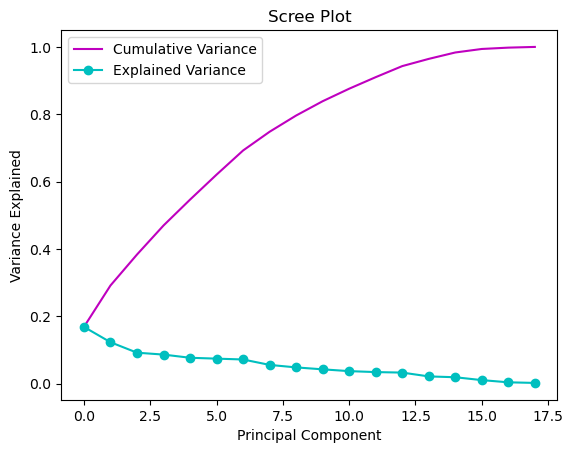

In [24]:
pca = PCA(n_components=18)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Select the top 18 principal components from X_train and X_test
X_train_reduced = X_train_pca[:, :18]
X_test_reduced = X_test_pca[:, :18]
explained_variance = pca.explained_variance_ratio_

num_components = len(explained_variance)
ind = np.arange(num_components)
cumulative_variance = np.cumsum(explained_variance)
plt.figure()
plt.plot(ind, cumulative_variance, 'm-', label='Cumulative Variance')
plt.plot(ind, explained_variance, 'c-o', label='Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.show()

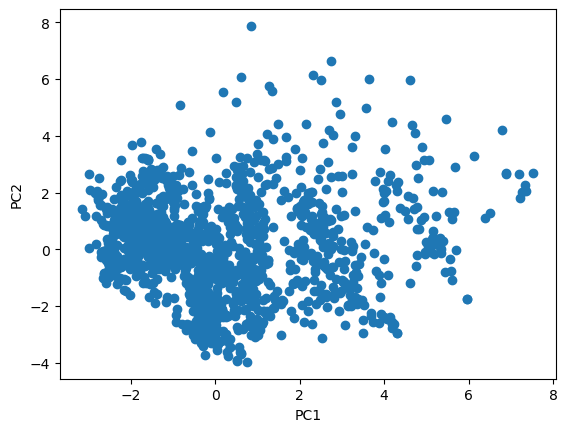

In [25]:
# Plot based on pca1 and pca2
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Model Training  
<font face="Arial" size=4><br>
Train the <code>linear regression</code> model and its regularized forms (<code>ridge</code> and <code>lasso</code>) on your training data. Cross-validate the models using <code>10 fold CV</code> and report the accuracy scores. You are allowed to use <code>sklearn.linear_model</code> for your implementation.

<div style="color:green">Linear Regression</div>
<div style="color:orange">Ridge Regression</div>
<div style="color:magenta">Lasso Regression</div>

In [26]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge(alpha=0.1)),
    ("Lasso Regression", Lasso(alpha=0.1))
]

for name, model in models:
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_reduced, y_train, cv=cv, scoring="neg_mean_squared_error")
    rmse_scores = (-scores) ** 0.5
    print(f"{name}: Mean RMSE = {rmse_scores.mean():.3f}")
    model.fit(X_train_reduced, y_train)

Linear Regression: Mean RMSE = 2.800
Ridge Regression: Mean RMSE = 2.800
Lasso Regression: Mean RMSE = 2.835


## Final Report  
<font face="Arial" size=4><br>
After training the data, use your pipeline previously created to transform the test data to decent form and then run your final model and report the accuracy score.

<div style="color:green">I've already transfer the test set in the above sections.</div>

Linear Regression MSE: 7.163
Linear Regression score: 0.900
Linear Regression corrcoef: 0.949
****
Ridge Regression MSE: 7.163
Ridge Regression score: 0.900
Ridge Regression corrcoef: 0.949
****
Lasso Regression MSE: 7.265
Lasso Regression score: 0.899
Lasso Regression corrcoef: 0.948
****


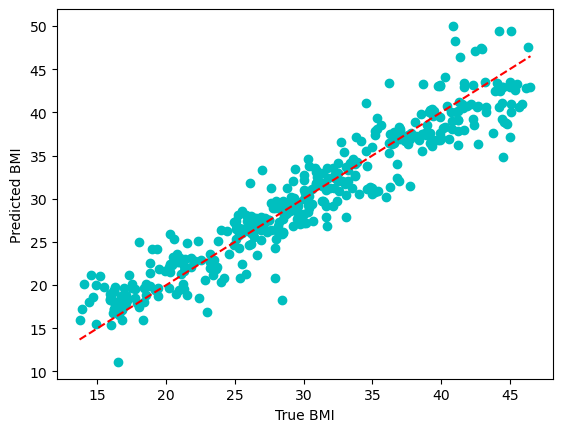

In [41]:
for name, model in models:
    y_prediction = model.predict(X_test_reduced)
    mse = mean_squared_error(y_test, y_prediction)
    score = model.score(X_test_reduced, y_test)
    print(f"{name} MSE: {mse:.3f}" )
    print(f"{name} score: {score:.3f}" )
    print(f"{name} corrcoef: {np.corrcoef(y_test, y_prediction)[0][1]:.3f}")
    print('****')
plt.scatter(y_test, y_prediction, c='c')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True BMI')
plt.ylabel('Predicted BMI')
plt.show()

<font face="Arial" size=4><br>
Discuss why you think this model worked best for the selected datasets and mention 3 areas where extra effort can be put into work to enhance the accuracy.

I'm not certain that this model is the best option for predicting BMI on this dataset, but we can make some extra efforts to improve accuracy. These include:

Feature engineering: We could create new features or transform existing ones to better capture the relationship between input variables and the target variable.

Model selection: Other models, such as decision trees, random forests or neural networks, might perform better on this data.

Collecting more data: With more data, we could build a better model.